# Sales Effectiveness 
# Category: Product Sales
# Project Ref: PM-PR-0019

#### Business Case:
FicZon Inc is an IT solution provider with products ranging from onpremises
products to SAAS based solutions. FicZon major leads
generation channel is digital and through their website.
FicZon business is majorly dependent on the sales force
effectiveness. As the market is maturing and more new competitors
entering the market, FicZon is experiencing the dip in sales.
Effective sales is dependent on lead quality and as of now, this is
based on manual categorization and highly depended on sales staff.
Though there is a quality process, which continuously updates the
lead categorization, it’s value is in for post analysis, rather than
conversation.
FicZon wants to explore Machine Learning to pre-categorize the lead
quality and as result, expecting significant increase in sales
effectiveness.

#### PROJECT GOAL:
1. Data exploration insights – Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low
Potential)

In [ ]:
# Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Users\prasa\AppData\Local\Temp\ipykernel_16568\2622363082.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Load the data

In [ ]:
!pip install pymysql
!pip install mysql-connector 
import mysql.connector


### making connections to database server

In [ ]:
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!')

In [4]:
## Check the number of databases available on the server.....
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [5]:
## connecting the database  (configure to initiate the connection to mysql)
connection=mysql.connector.connect(host='18.136.157.135',
                                   user='dm_team2',
                                   password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [6]:
# view tables present in project_sales database....

db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [7]:
# The SELECT statement is used to select data from a database.
# Select * will select all the fields (all rows and columns) available in the table.

query = "select * from data"  # SQL statement to select all fields in 'data' table.
data = pd.read_sql(query,connection) 
print(data.shape)
data

(7422, 9)


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Basic Checks

In [8]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [9]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


#### Check all rows and columns

In [11]:
data.head(pd.set_option('display.max_columns',None))#to diplay all columns from dataset

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [12]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [13]:
data.index

RangeIndex(start=0, stop=7422, step=1)

In [14]:
data.values

array([['14-11-2018 10:05', '', 'Website', ..., '', 'Mode-5', 'Open'],
       ['14-11-2018 09:22', '', 'Website', ..., '', 'Mode-5', 'Open'],
       ['14-11-2018 09:21', '', 'Website', ..., '', 'Mode-5', 'Open'],
       ...,
       ['28-04-2018 09:20', '5', 'Live Chat-Direct', ..., 'Bangalore',
        'Mode-1', 'Not Responding'],
       ['28-04-2018 08:04', '21', 'CRM form', ..., 'Other Locations',
        'Mode-1', 'Just Enquiry'],
       ['28-04-2018 07:54', '25', 'Website', ..., 'Chennai', 'Mode-1',
        'CONVERTED']], dtype=object)

In [15]:
data.shape

(7422, 9)

In [16]:
data.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

## To create new columns from date-time  for day,month,year,hour,minute,weekday etc....to get more accurate results

In [17]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


#### date,time needs to set in the right form to do further analysis.....

In [18]:
data['Created']=pd.to_datetime(data.Created)

In [19]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,2018-11-14 09:22:00,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,2018-11-14 09:21:00,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,2018-11-14 08:46:00,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,2018-11-14 07:34:00,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [20]:
data['Day']=data.Created.dt.day
data['Month']=data.Created.dt.month
data['Weekday']=data.Created.dt.weekday
#data['Year']=data.Created.dt.year  #everyone same year
data['Hour']=data.Created.dt.hour
data['Minute']=data.Created.dt.minute

In [21]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Hour,Minute
0,2018-11-14 10:05:00,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open,14,11,2,10,5
1,2018-11-14 09:22:00,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open,14,11,2,9,22
2,2018-11-14 09:21:00,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open,14,11,2,9,21
3,2018-11-14 08:46:00,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14,11,2,8,46
4,2018-11-14 07:34:00,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open,14,11,2,7,34


### We have some empty fields , no more, around 1-2%, just delete those rows 

In [22]:
data.drop(data[data['Product_ID']==''].index,inplace=True)
data.drop(data[data['Location']==''].index,inplace=True)
data.drop(data[data['Source']==''].index,inplace=True)
data.drop(data[data['Delivery_Mode']==''].index,inplace=True)
data.drop(data[data['Sales_Agent']==''].index,inplace=True)
data.drop(data[data['Day']==''].index,inplace=True)
data.drop(data[data['Month']==''].index,inplace=True)
data.drop(data[data['Weekday']==''].index,inplace=True)
data.drop(data[data['Hour']==''].index,inplace=True)
data.drop(data[data['Minute']==''].index,inplace=True)
data.drop(data[data['Status']==''].index,inplace=True)

In [23]:
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Hour,Minute
18,2018-11-13 18:51:00,9,Live Chat-Google Organic,971XXXXXXX,mXXXXXXX@gmail.com,Sales-Agent-3,Bangalore,Mode-1,Potential,13,11,1,18,51
19,2018-11-13 18:48:00,19,Call,701XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Potential,13,11,1,18,48
24,2018-11-13 17:09:00,18,Website,790XXXXXXX,gXXXXXXX@gmail.com,Sales-Agent-11,Trivandrum,Mode-1,Potential,13,11,1,17,9
25,2018-11-13 16:49:00,15,Website,970XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,13,11,1,16,49
26,2018-11-13 16:37:00,18,Call,740XXXXXXX,nXXXXXXX@gmail.com,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,13,11,1,16,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST,28,4,5,9,45
7418,2018-04-28 09:43:00,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST,28,4,5,9,43
7419,2018-04-28 09:20:00,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding,28,4,5,9,20
7420,2018-04-28 08:04:00,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry,28,4,5,8,4


## Rearrage the column for standard

In [24]:
data = data.reindex(columns=['Product_ID','Location','Source','Delivery_Mode','Sales_Agent','Day','Month','Weekday','Hour','Minute','Status'])

In [25]:
data

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,Bangalore,Live Chat-Google Organic,Mode-1,Sales-Agent-3,13,11,1,18,51,Potential
19,19,Other Locations,Call,Mode-5,Sales-Agent-4,13,11,1,18,48,Potential
24,18,Trivandrum,Website,Mode-1,Sales-Agent-11,13,11,1,17,9,Potential
25,15,Hyderabad,Website,Mode-1,Sales-Agent-7,13,11,1,16,49,Not Responding
26,18,Bangalore,Call,Mode-1,Sales-Agent-7,13,11,1,16,37,In Progress Positive
...,...,...,...,...,...,...,...,...,...,...,...
7417,9,Mumbai,Call,Mode-4,Sales-Agent-6,28,4,5,9,45,LOST
7418,15,Other Locations,Call,Mode-5,Sales-Agent-12,28,4,5,9,43,LOST
7419,5,Bangalore,Live Chat-Direct,Mode-1,Sales-Agent-11,28,4,5,9,20,Not Responding
7420,21,Other Locations,CRM form,Mode-1,Sales-Agent-4,28,4,5,8,4,Just Enquiry


In [26]:
data.Status.value_counts()

Status
Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: count, dtype: int64

In [27]:
# Defining 'Status' as 'Good' or 'Bad'
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Good',inplace=True)
data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Bad',inplace=True)

In [30]:
data.Source.value_counts()

Source
Call                             2536
Live Chat-Direct                 1827
Website                          1551
Live Chat-Google Organic          269
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        129
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      49
By Recommendation                  32
Existing Customer                  22
CRM form                           22
Live Chat-Google Ads               20
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [31]:
# Compressing and Merging the labels in column
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.Source.replace('By Recommendation','Customer Referral',inplace=True)
data.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [32]:
data.head()

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,Bangalore,Live Chat,Mode-1,Sales-Agent-3,13,11,1,18,51,Good
19,19,Other Locations,Call,Mode-5,Sales-Agent-4,13,11,1,18,48,Good
24,18,Trivandrum,Website,Mode-1,Sales-Agent-11,13,11,1,17,9,Good
25,15,Hyderabad,Website,Mode-1,Sales-Agent-7,13,11,1,16,49,Bad
26,18,Bangalore,Call,Mode-1,Sales-Agent-7,13,11,1,16,37,Good


# DOMAIN ANALYSIS

##### What is sales effectiveness?


*Sales effectiveness refers to the ability of a company's sales professionals to “win” at each stage of the customer's buying process, and ultimately earn the business on the right terms and in the right timeframe.



#### Purpose:-


*The purpose of sales force effectiveness is to increase company revenues through increased customer acquisition, product/service sales, and up-selling/cross-selling additional products and services. The purpose of sales force effectiveness metrics is "to measure the performance of a sales force and of individual salespeople." *"When analyzing the performance of a salesperson, a number of metrics can be compared. These can reveal more about the salesperson than can be gauged by his or her total sales. When analyzing the performance of a sales team, an increase in revenue-per-rep can indicate improvement in salesforce effectiveness."

​

# EDA

# Univariate Analysis

In [33]:
data.head()

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,Bangalore,Live Chat,Mode-1,Sales-Agent-3,13,11,1,18,51,Good
19,19,Other Locations,Call,Mode-5,Sales-Agent-4,13,11,1,18,48,Good
24,18,Trivandrum,Website,Mode-1,Sales-Agent-11,13,11,1,17,9,Good
25,15,Hyderabad,Website,Mode-1,Sales-Agent-7,13,11,1,16,49,Bad
26,18,Bangalore,Call,Mode-1,Sales-Agent-7,13,11,1,16,37,Good


In [34]:
#installing sweetviz library`
!pip install sweetviz    

Defaulting to user installation because normal site-packages is not writeable


In [35]:
#import sweetviz as sv #importing sweetviz library 
#my_report = sv.analyze(data)#syntax to use sweetviz
#my_report.show_html() #Default arguments will generate to "SWEETVIZ_REPORT.html"

In [37]:
data.Location.value_counts()

Location
Other Locations    2481
Bangalore          2079
Chennai             907
Hyderabad           527
Delhi               470
Mumbai              399
Pune                139
UAE                  77
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

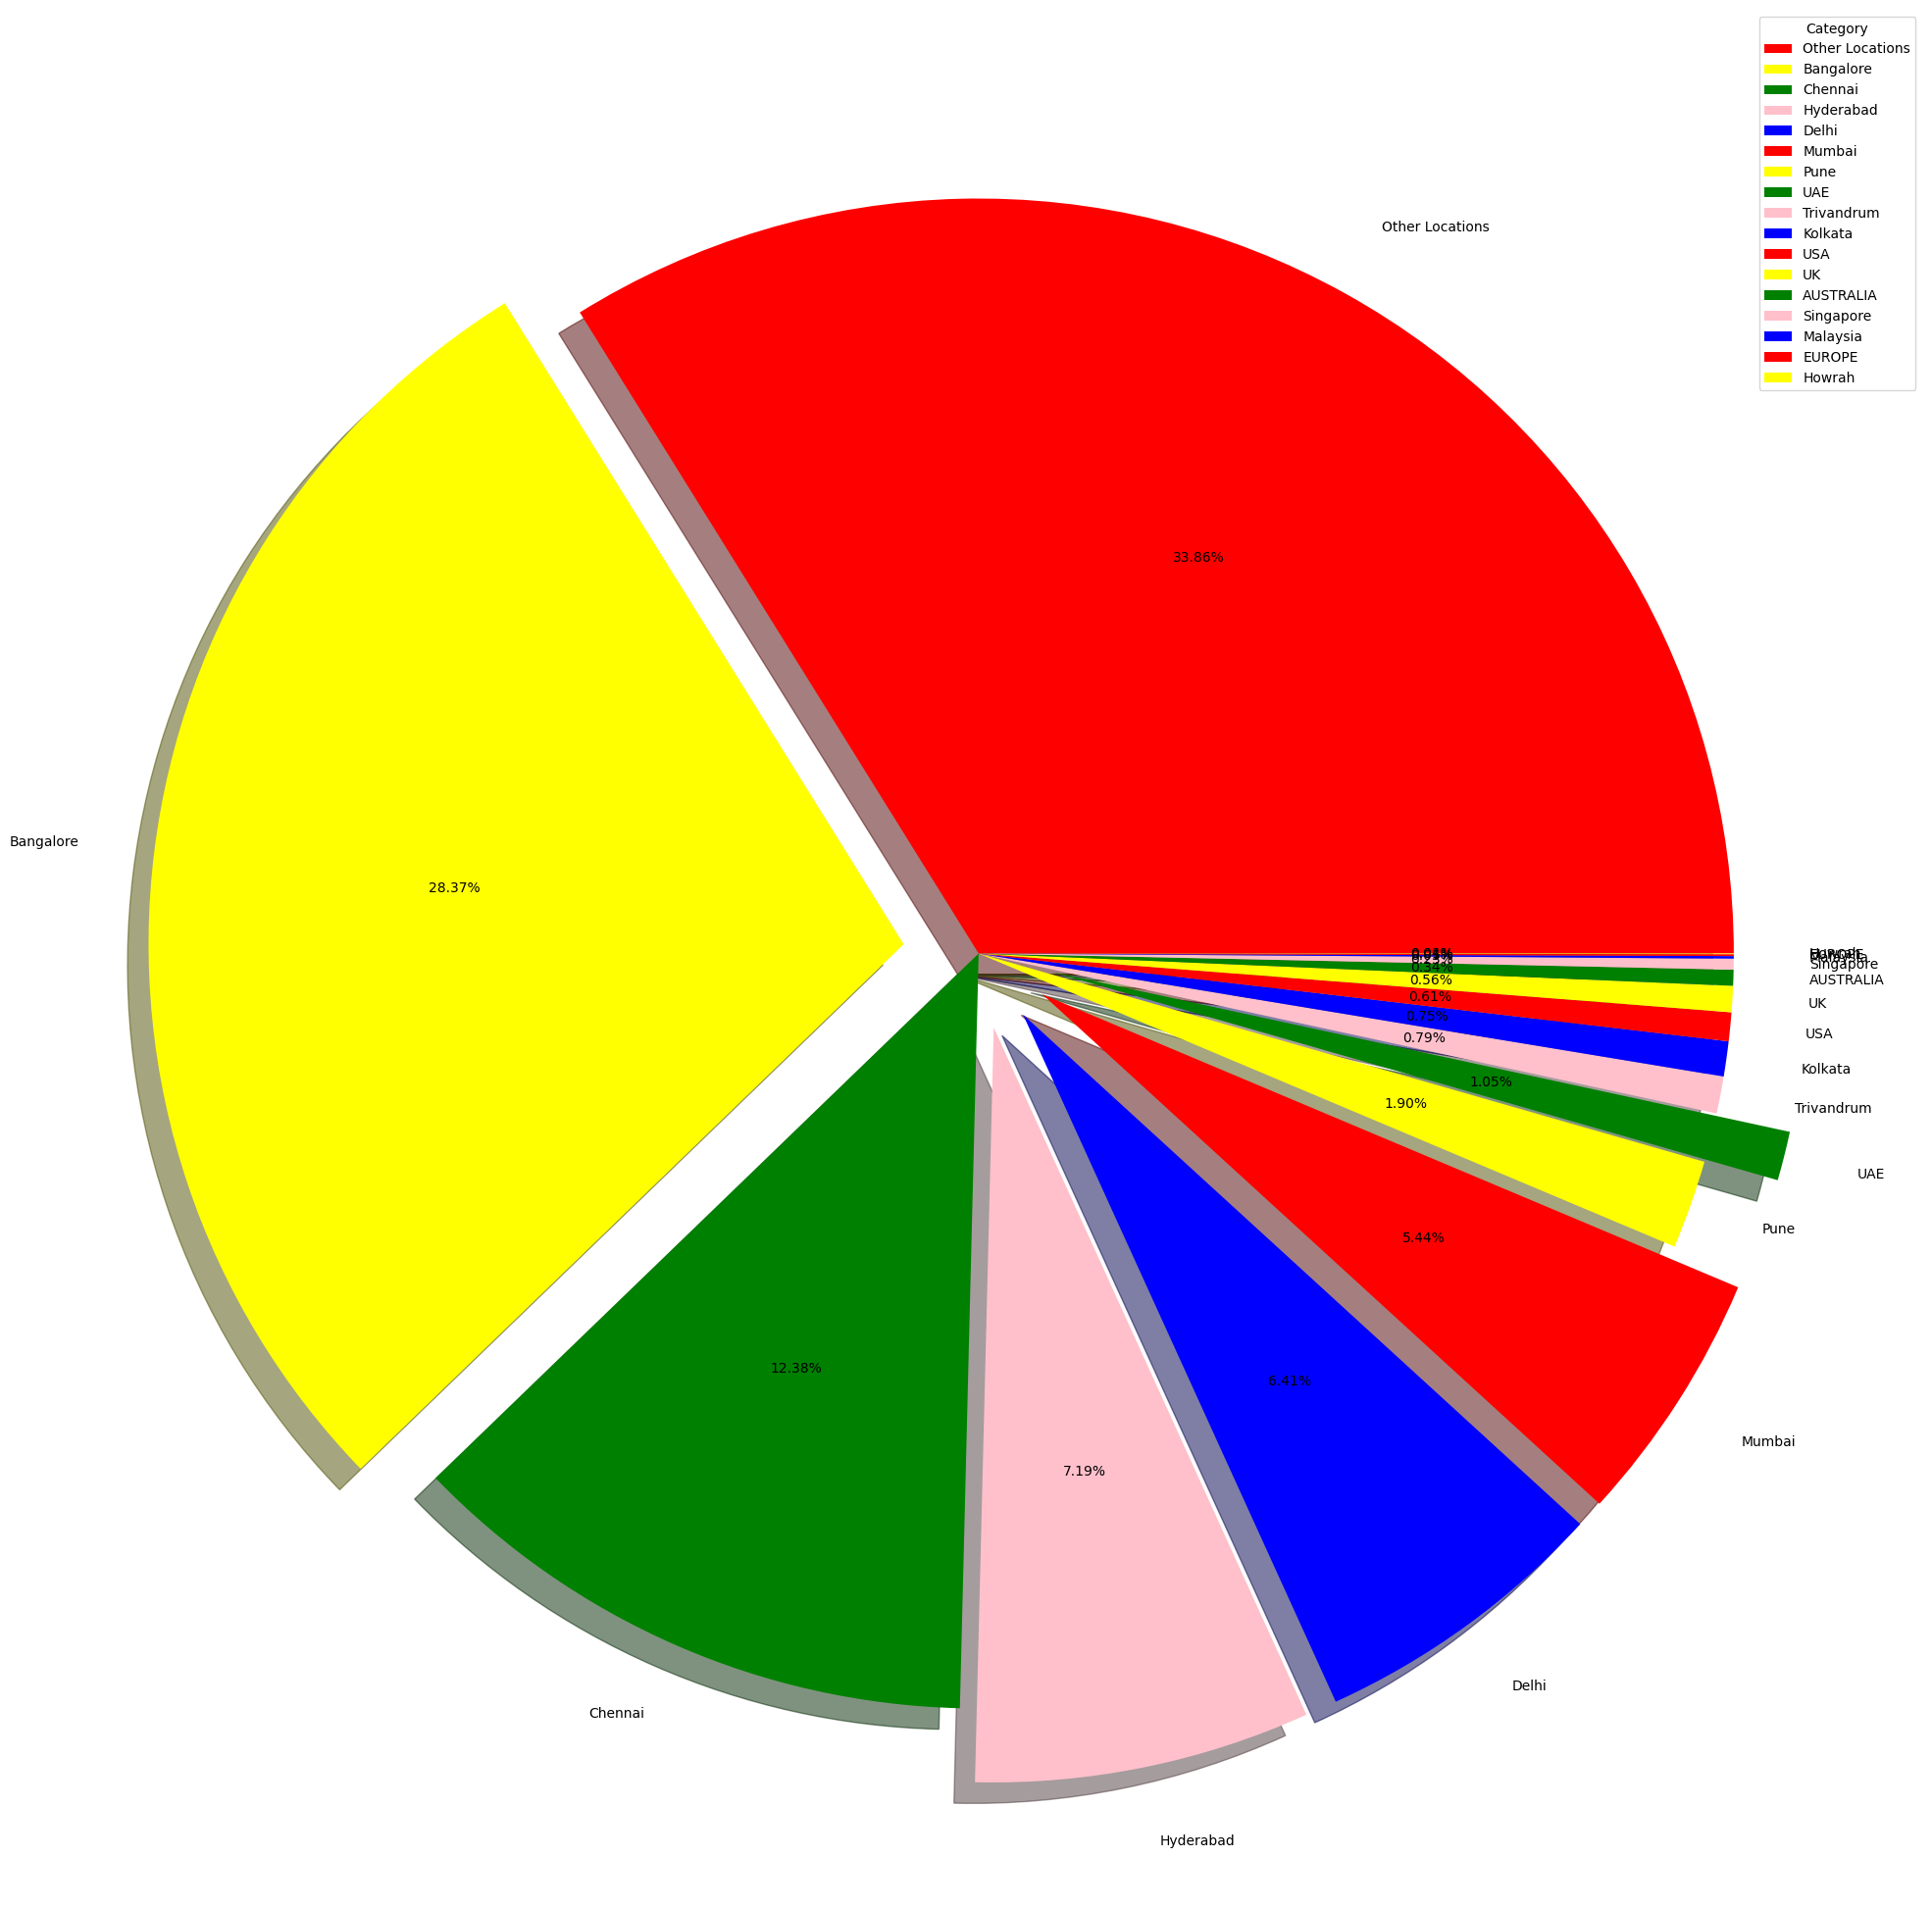

<Figure size 640x480 with 0 Axes>

In [44]:
plt.figure(figsize=(25,25))
labels=['Other Locations',
'Bangalore',          
'Chennai',          
'Hyderabad',           
'Delhi',               
'Mumbai',              
'Pune',                
'UAE',                 
'Trivandrum',          
'Kolkata',             
'USA',                 
'UK',                  
'AUSTRALIA',
'Singapore',           
'Malaysia',          
'EUROPE',       
'Howrah']
size=data['Location'].value_counts()
colors=['red','yellow','green','pink','blue']
explode=[0,0.1,0,0.1,0.1,0.1,0,0.1,0,0,0,0,0,0,0,0,0]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
plt.legend(labels,loc=0,title='Category')
plt.show()
plt.tight_layout()


([0, 1], [Text(0, 0, 'Good'), Text(1, 0, 'Bad')])

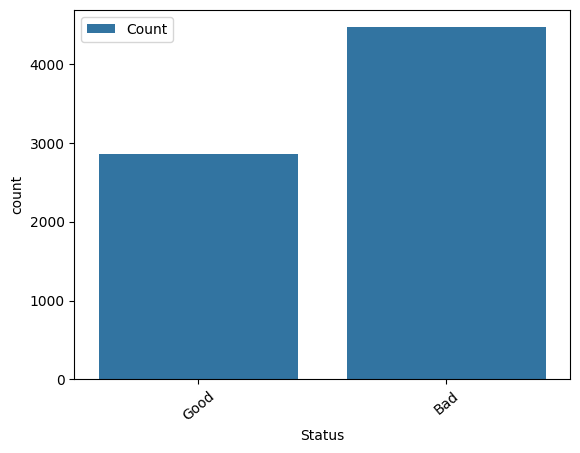

In [45]:
ax = sns.countplot(data = data, x = 'Status', label='Count')

catagory = data['Status'].value_counts()
plt.xticks(fontsize=10,rotation = 40)

# Bivariate Analysis

In [ ]:
# Plotting how every feature correlate with the "Status"
plt.figure(figsize=(10,40), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in data:
    if plotnumber<=11 :
        ax = plt.subplot(11,2,plotnumber)
        sns.countplot(x=data[column].dropna(axis=0))
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Status',fontsize=10)
        plt.xticks(fontsize=10,rotation = 35)
    plotnumber+=1
plt.tight_layout()

# Multivariate Analysis

In [ ]:
# let's see how data is distributed for every column
plt.figure(figsize=(10,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=11 :
        ax = plt.subplot(11,2,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

# PREPROCESSING

In [46]:
data.info()# To check  data type and  null value of all columns.....

<class 'pandas.core.frame.DataFrame'>
Index: 7328 entries, 18 to 7421
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     7328 non-null   object
 1   Location       7328 non-null   object
 2   Source         7328 non-null   object
 3   Delivery_Mode  7328 non-null   object
 4   Sales_Agent    7328 non-null   object
 5   Day            7328 non-null   int32 
 6   Month          7328 non-null   int32 
 7   Weekday        7328 non-null   int32 
 8   Hour           7328 non-null   int32 
 9   Minute         7328 non-null   int32 
 10  Status         7328 non-null   object
dtypes: int32(5), object(6)
memory usage: 543.9+ KB


In [47]:
data.describe()#used to view some basic statistical details like percentile, mean, std etc. 

,Day,Month,Weekday,Hour,Minute
count,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000
mean,15.652975,7.482942,2.365993,13.314683,28.651883
std,9.063569,1.868689,1.831752,4.031511,17.303704
min,1.000000,4.000000,0.000000,0.000000,0.000000
25%,8.000000,6.000000,1.000000,11.000000,13.000000
50%,15.000000,7.000000,2.000000,13.000000,29.000000
75%,24.000000,9.000000,4.000000,16.000000,45.000000
max,31.000000,11.000000,6.000000,23.000000,59.000000


In [ ]:
data.describe(include=['O'])#It will give you info about categorical data/columns

In [ ]:
data.shape

### Checking Missing values

In [ ]:
data.isnull().sum()

## Conversion of categorical column into numerical column

In [ ]:
data.head(2)

In [39]:
data.Location.value_counts()

Other Locations    2481
Bangalore          2079
Chennai             907
Hyderabad           527
Delhi               470
Mumbai              399
Pune                139
UAE                  77
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [40]:
## Using label encoder to convert the categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.Location=lc.fit_transform(data.Location)
data.Source=lc.fit_transform(data.Source)
data.Delivery_Mode=lc.fit_transform(data.Delivery_Mode)
data.Sales_Agent=lc.fit_transform(data.Sales_Agent)
data.Status=lc.fit_transform(data.Status)


In [41]:
data.head()

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,1,4,0,4,13,11,1,18,51,1
19,19,10,0,4,5,13,11,1,18,48,1
24,18,13,5,0,1,13,11,1,17,9,1
25,15,6,5,0,8,13,11,1,16,49,0
26,18,1,0,0,8,13,11,1,16,37,1


In [42]:
data.head(1)

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9,1,4,0,4,13,11,1,18,51,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7328 entries, 18 to 7421
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_ID     7328 non-null   object
 1   Location       7328 non-null   int32 
 2   Source         7328 non-null   int32 
 3   Delivery_Mode  7328 non-null   int32 
 4   Sales_Agent    7328 non-null   int32 
 5   Day            7328 non-null   int64 
 6   Month          7328 non-null   int64 
 7   Weekday        7328 non-null   int64 
 8   Hour           7328 non-null   int64 
 9   Minute         7328 non-null   int64 
 10  Status         7328 non-null   int32 
dtypes: int32(5), int64(5), object(1)
memory usage: 543.9+ KB


# Conversion object type to int/float type

In [44]:
data['Product_ID'] = data['Product_ID'].astype('float')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7328 entries, 18 to 7421
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     7328 non-null   float64
 1   Location       7328 non-null   int32  
 2   Source         7328 non-null   int32  
 3   Delivery_Mode  7328 non-null   int32  
 4   Sales_Agent    7328 non-null   int32  
 5   Day            7328 non-null   int64  
 6   Month          7328 non-null   int64  
 7   Weekday        7328 non-null   int64  
 8   Hour           7328 non-null   int64  
 9   Minute         7328 non-null   int64  
 10  Status         7328 non-null   int32  
dtypes: float64(1), int32(5), int64(5)
memory usage: 543.9 KB


# Analysing data

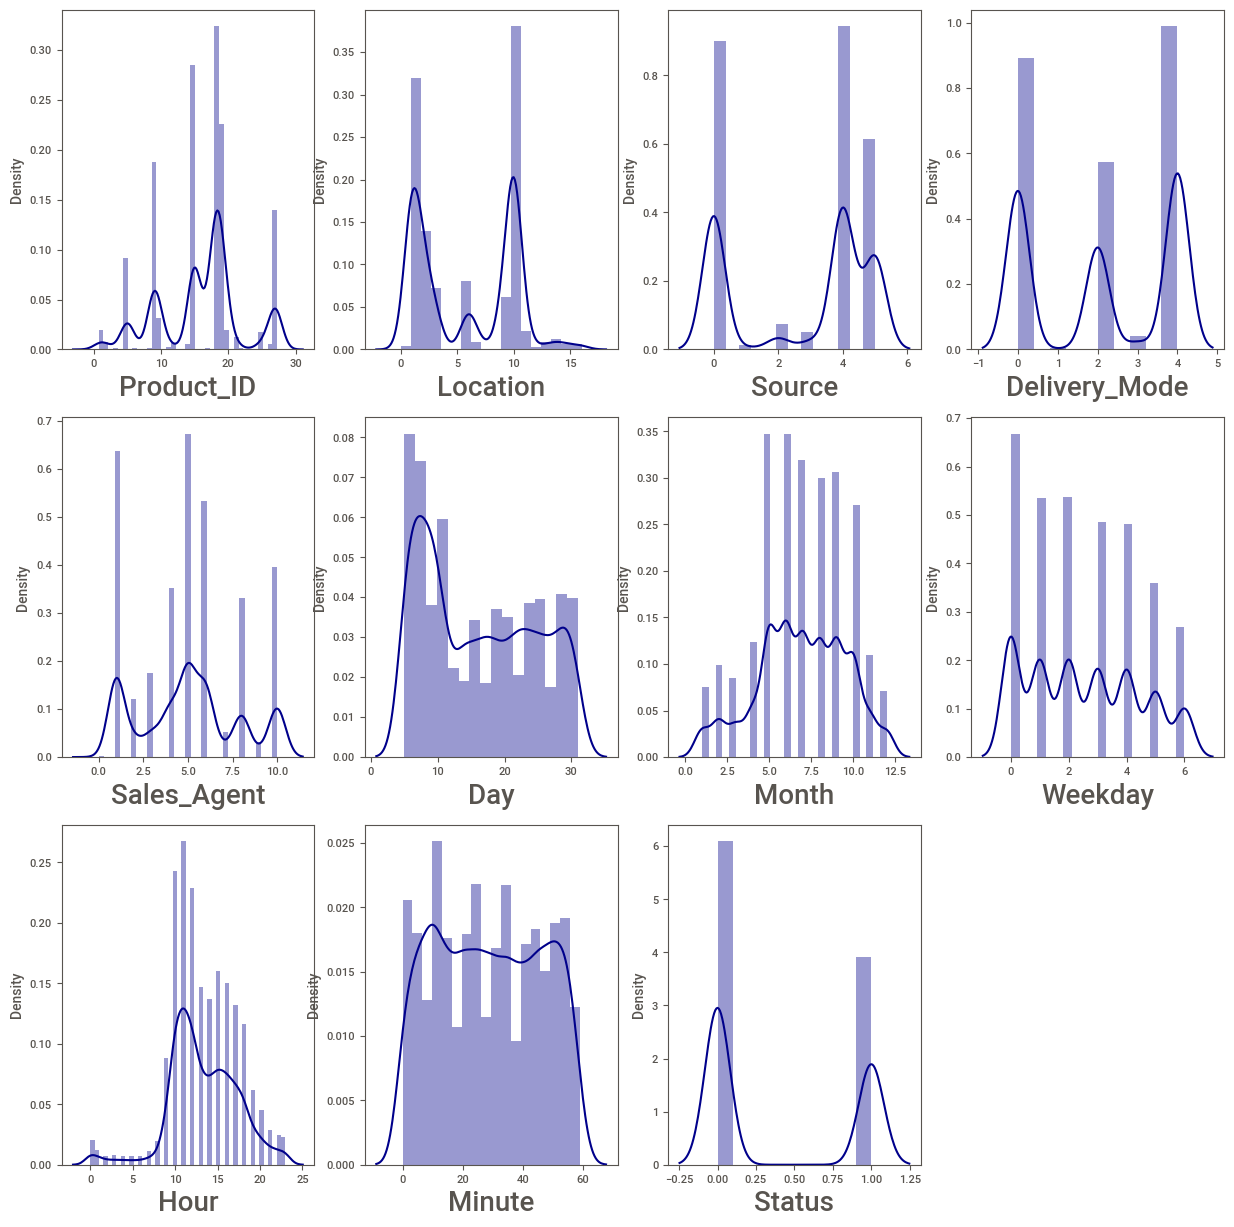

In [46]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in data:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(x=data[column],color='darkblue')
        plt.xlabel(column,fontsize=20)
        plotnumber +=1
plt.show()

# Checking For Outlier

<Axes: xlabel='Product_ID'>

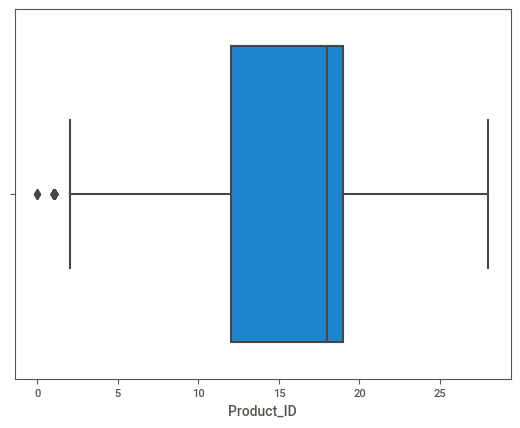

In [47]:
sns.boxplot(x=data["Product_ID"])   

<Axes: xlabel='Location'>

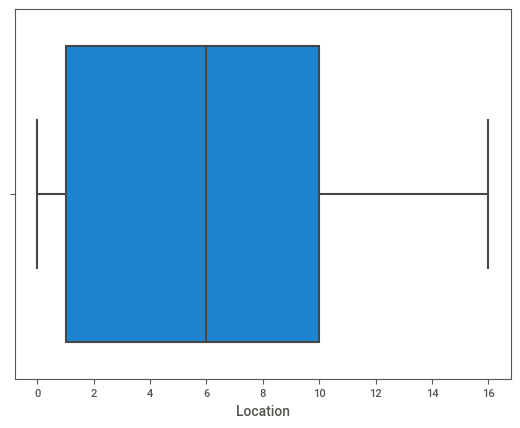

In [48]:
sns.boxplot(x=data["Location"])   

<Axes: xlabel='Source'>

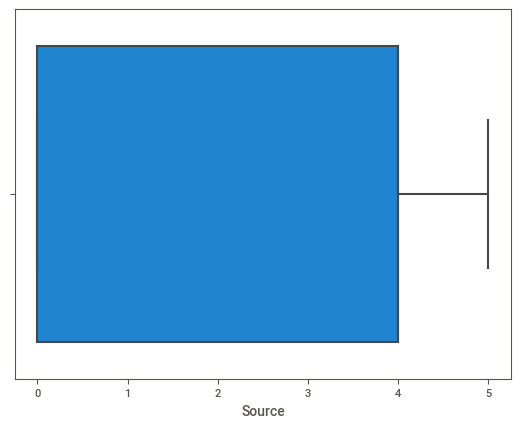

In [49]:
sns.boxplot(x=data["Source"])

<Axes: xlabel='Delivery_Mode'>

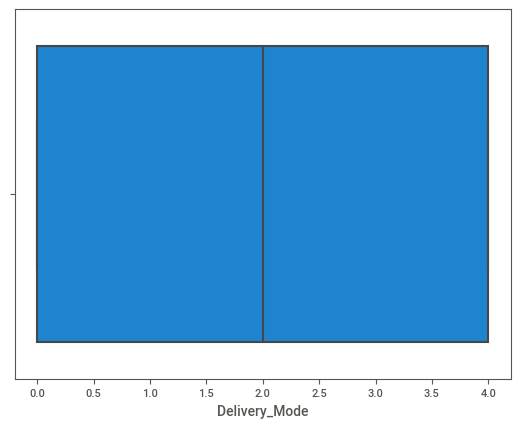

In [50]:
sns.boxplot(x=data["Delivery_Mode"]) 

<Axes: xlabel='Sales_Agent'>

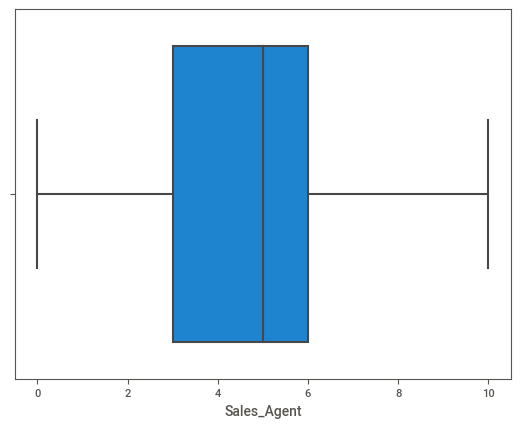

In [51]:
sns.boxplot(x=data["Sales_Agent"]) 

In [52]:
data.head(1)

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9.0,1,4,0,4,13,11,1,18,51,1


<Axes: xlabel='Day'>

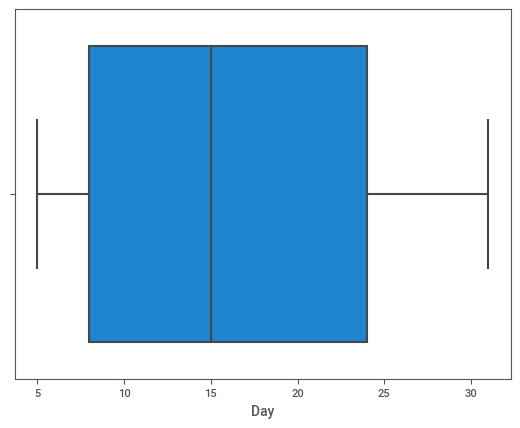

In [53]:
sns.boxplot(x=data["Day"]) 

<Axes: xlabel='Month'>

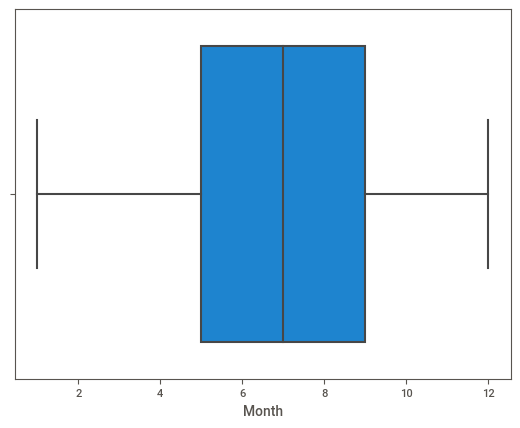

In [54]:
sns.boxplot(x=data["Month"]) 

<Axes: xlabel='Weekday'>

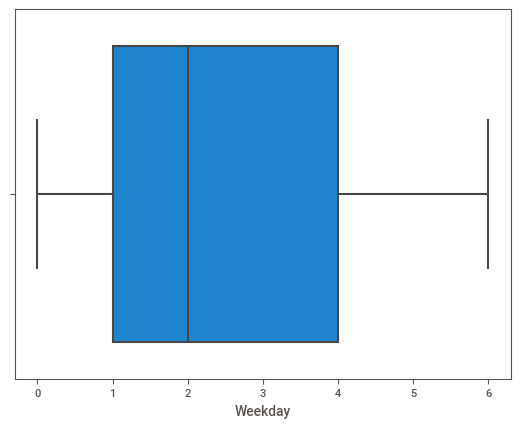

In [55]:
sns.boxplot(x=data["Weekday"]) 

<Axes: xlabel='Hour'>

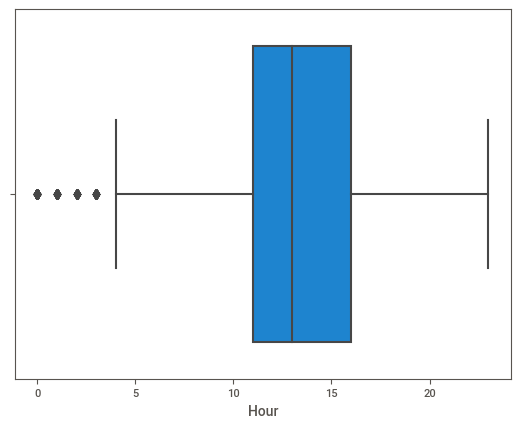

In [56]:
sns.boxplot(x=data["Hour"]) 

<Axes: xlabel='Minute'>

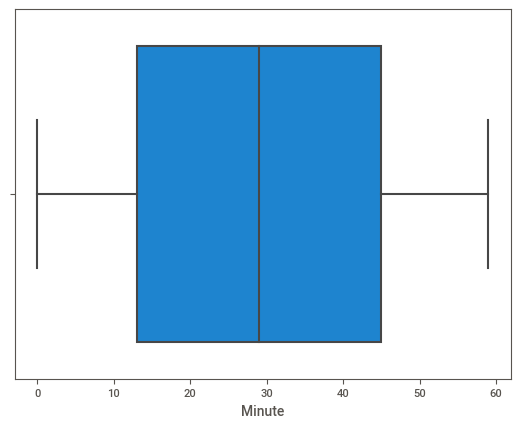

In [57]:
sns.boxplot(x=data["Minute"]) 

#### From these Boxplot it is clear that....product_id and Hour columns have some outliers lets handle it.... 

### Handling outliers

##### Product_ID

In [58]:
from scipy import stats

In [59]:
IQR = stats.iqr(data.Product_ID, interpolation = 'midpoint') #calculating Inter quantile range
#mid point is middle 50%

IQR

7.0

In [60]:
Q1=data.Product_ID.quantile(0.25)#defining 25% of data
Q3=data.Product_ID.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit


In [61]:
min_limit

1.5

In [62]:
max_limit

29.5

In [63]:
data.loc[data['Product_ID']<min_limit] #checking values which are less than minimum limit

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
272,1.0,1,5,0,4,11,5,4,16,42,0
275,1.0,2,4,2,10,11,5,4,15,41,0
423,1.0,11,4,2,4,31,10,2,10,43,0
454,1.0,10,0,4,1,30,10,1,11,6,0
581,1.0,6,4,2,6,26,10,4,11,17,1
...,...,...,...,...,...,...,...,...,...,...,...
7112,1.0,2,5,0,4,5,5,5,10,34,0
7138,1.0,1,4,0,4,5,4,3,16,55,0
7151,1.0,2,4,0,3,5,4,3,11,45,0
7283,1.0,10,0,4,1,5,2,0,10,8,0


In [64]:
data.loc[data['Product_ID']>max_limit]#checking values which are greater than maximum limit

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status


In [65]:
data.loc[data['Product_ID']>max_limit,'Product_ID']=np.median(data.Product_ID)

In [66]:
#imputing outlier with with median
data.loc[data['Product_ID']<min_limit,'Product_ID']=np.median(data.Product_ID)

In [67]:
data.loc[data['Product_ID']<min_limit] #checking values which are less than minimum limit

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status


##### Hour

In [68]:
IQR = stats.iqr(data.Hour,interpolation = 'midpoint') #calculating Inter quantile range
#mid point is middle 50%

IQR

5.0

In [69]:
Q1=data.Hour.quantile(0.25)#defining 25% of data
Q3=data.Hour.quantile(0.75)##defining 75% of data

min_limit=Q1 - 1.5*IQR #setting minimum limit

max_limit=Q3 + 1.5*IQR #setting maximum limit

In [70]:
min_limit

3.5

In [71]:
max_limit

23.5

In [72]:
data.loc[data['Hour']<min_limit] #checking values which are less than minimum limit

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
159,15.0,11,5,4,8,11,10,3,0,11,1
253,9.0,3,5,2,8,11,7,2,2,7,0
261,18.0,7,5,2,8,11,6,0,0,46,0
305,27.0,10,5,4,4,11,4,2,2,5,0
323,27.0,1,5,0,10,11,3,6,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...
7172,5.0,2,5,0,1,5,4,3,0,38,1
7220,15.0,10,3,0,5,5,3,0,0,41,0
7305,19.0,10,5,0,10,5,1,4,3,47,0
7306,9.0,9,4,0,1,5,1,4,1,15,0


In [73]:
data.loc[data['Hour']>max_limit] #checking values which are less than minimum limit

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status


In [74]:
#imputing outlier with with median
data.loc[data['Hour']<min_limit,'Hour']=np.median(data.Hour)

In [75]:
data.loc[data['Hour']<min_limit] #checking values which are less than minimum limit

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status


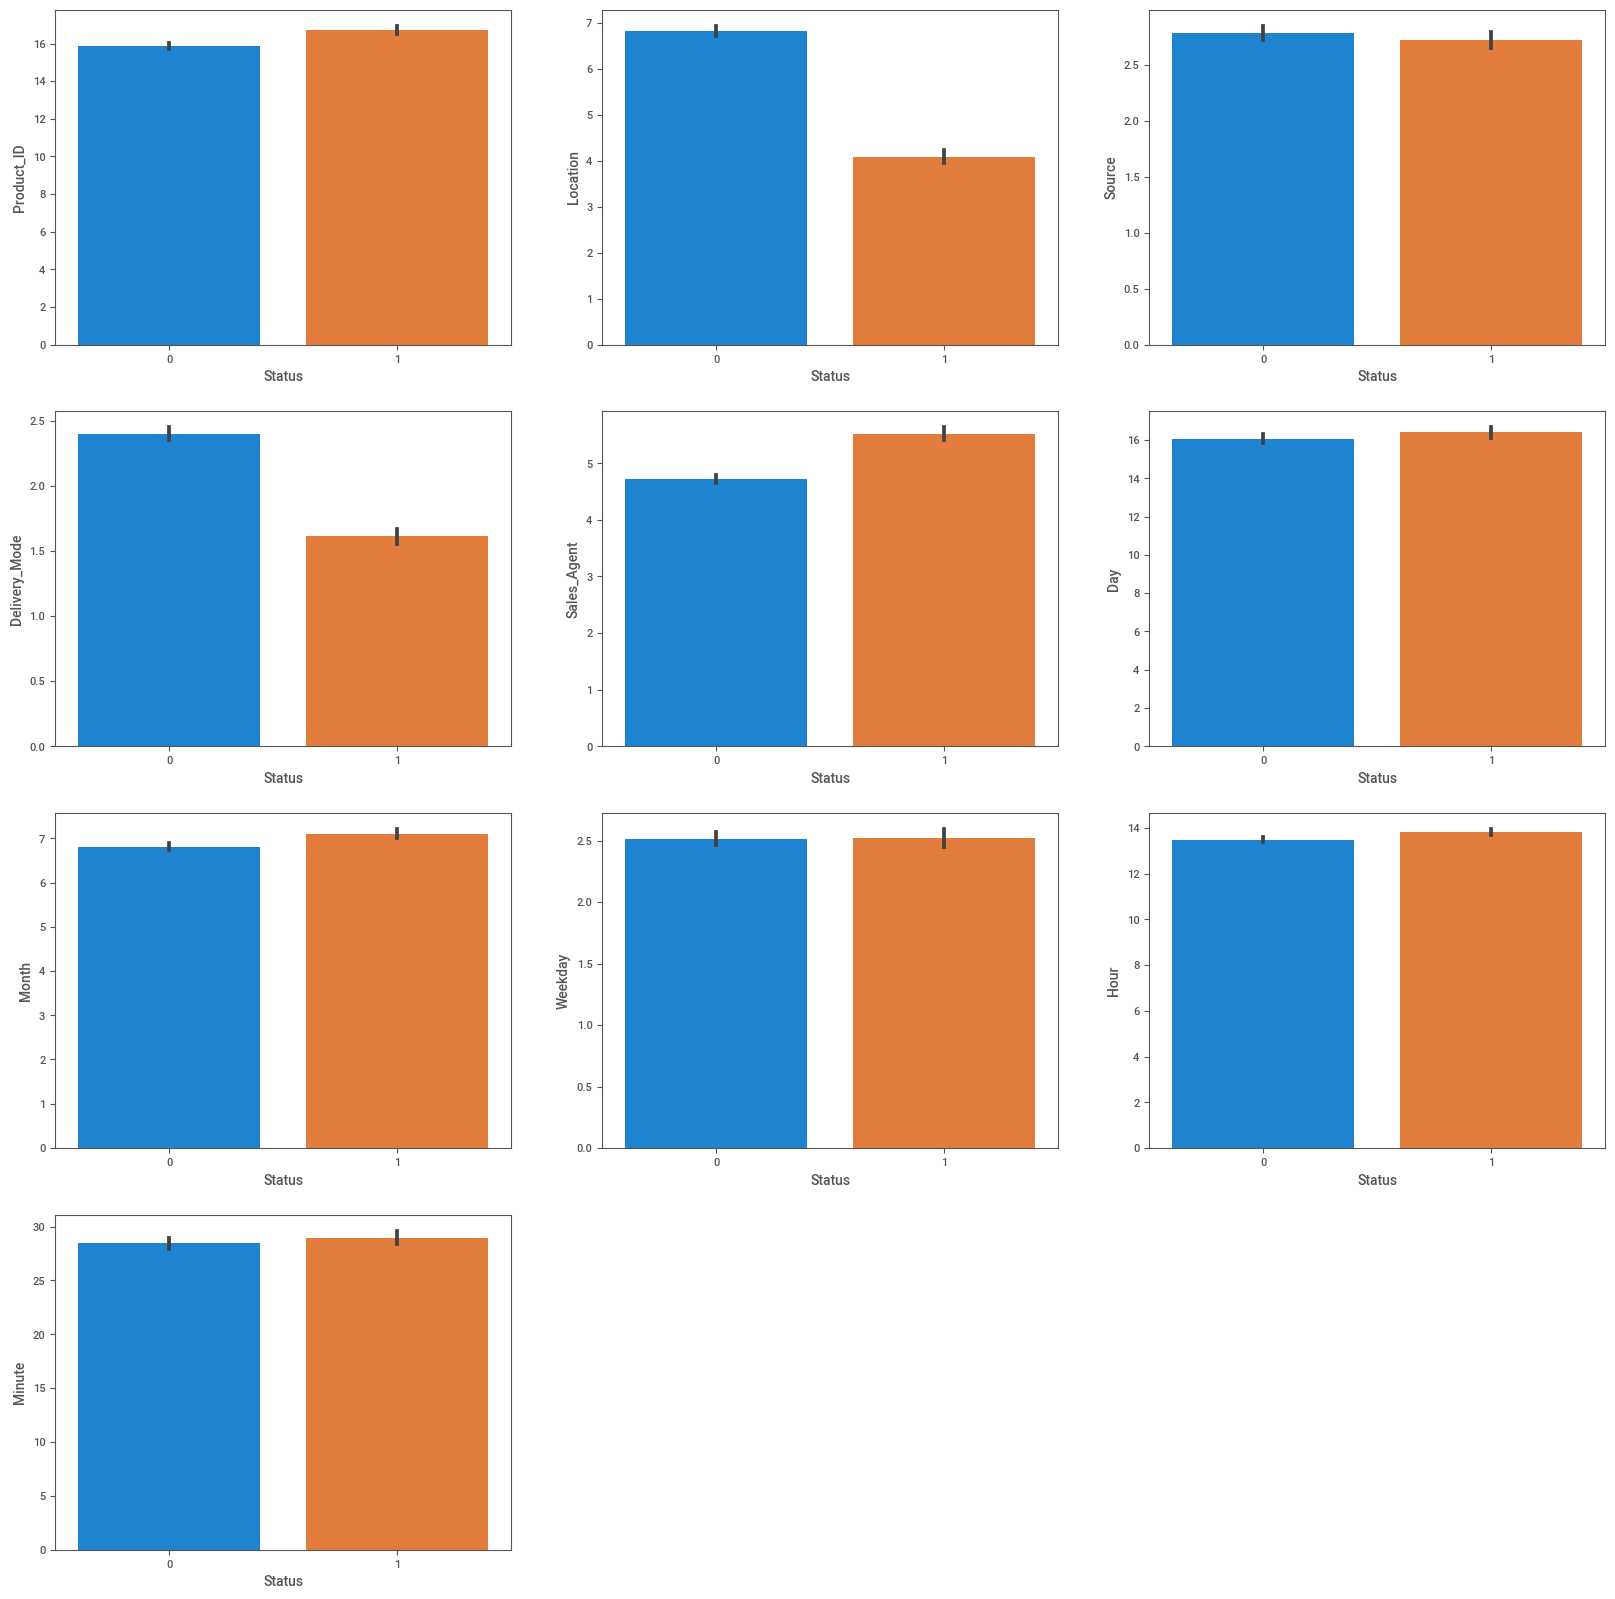

In [76]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(x=data['Status'],y=data['Product_ID'])
plt.subplot(4,3,2)
sns.barplot(x=data['Status'],y=data['Location'])
plt.subplot(4,3,3)
sns.barplot(x=data['Status'],y=data['Source'])
plt.subplot(4,3,4)
sns.barplot(x=data['Status'],y=data['Delivery_Mode'])
plt.subplot(4,3,5)
sns.barplot(x=data['Status'],y=data['Sales_Agent'])
plt.subplot(4,3,6)
sns.barplot(x=data['Status'],y=data['Day'])
plt.subplot(4,3,7)
sns.barplot(x=data['Status'],y=data['Month'])
plt.subplot(4,3,8)
sns.barplot(x=data['Status'],y=data['Weekday'])
plt.subplot(4,3,9)
sns.barplot(x=data['Status'],y=data['Hour'])
plt.subplot(4,3,10)
sns.barplot(x=data['Status'],y=data['Minute'])

plt.show()

# Checking the duplicate rows

In [77]:
data.drop_duplicates()

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9.0,1,4,0,4,13,11,1,18,51,1
19,19.0,10,0,4,5,13,11,1,18,48,1
24,18.0,13,5,0,1,13,11,1,17,9,1
25,15.0,6,5,0,8,13,11,1,16,49,0
26,18.0,1,0,0,8,13,11,1,16,37,1
...,...,...,...,...,...,...,...,...,...,...,...
7417,9.0,9,0,3,7,28,4,5,9,45,0
7418,15.0,10,0,4,2,28,4,5,9,43,0
7419,5.0,1,4,0,1,28,4,5,9,20,0
7420,21.0,10,3,0,5,28,4,5,8,4,0


In [78]:
data.duplicated().sum()  

26

In [79]:
data.drop_duplicates(inplace = True)

In [80]:
data.duplicated().sum()

0

# Feature Selection

In [81]:
data.head()

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute,Status
18,9.0,1,4,0,4,13,11,1,18,51,1
19,19.0,10,0,4,5,13,11,1,18,48,1
24,18.0,13,5,0,1,13,11,1,17,9,1
25,15.0,6,5,0,8,13,11,1,16,49,0
26,18.0,1,0,0,8,13,11,1,16,37,1


<Axes: >

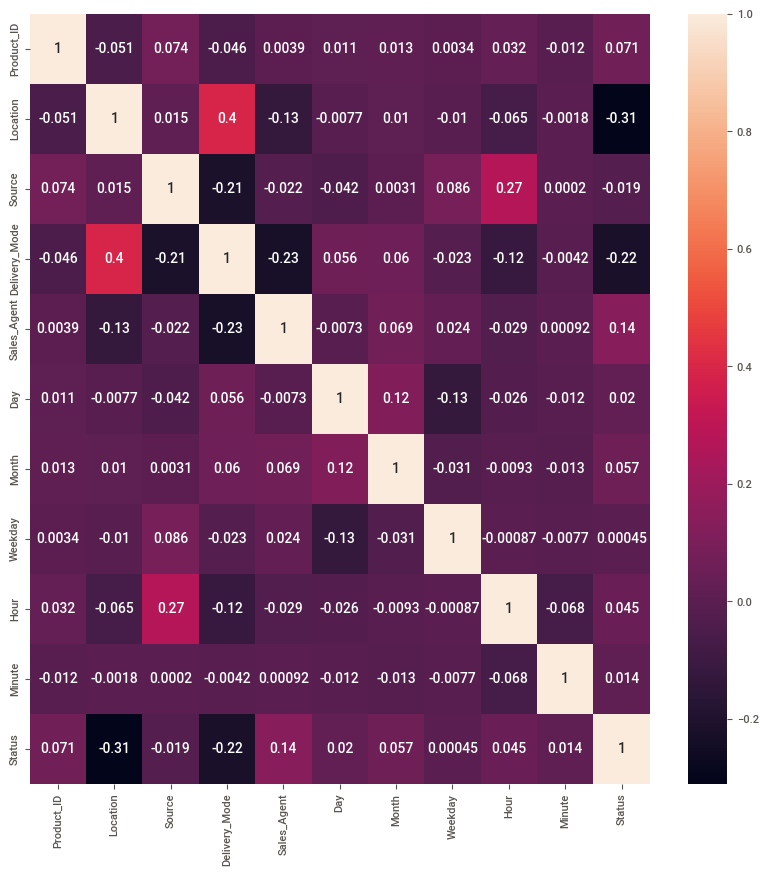

In [82]:
plt.figure(figsize=(10,10))#canvas size
sns.heatmap(data.corr(),annot=True)

# Model Creation

In [83]:
## defining X and y
X=data[['Product_ID','Location','Source','Delivery_Mode','Sales_Agent','Day','Month','Weekday','Hour','Minute']]
y=data.Status

In [84]:
X

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Day,Month,Weekday,Hour,Minute
18,9.0,1,4,0,4,13,11,1,18,51
19,19.0,10,0,4,5,13,11,1,18,48
24,18.0,13,5,0,1,13,11,1,17,9
25,15.0,6,5,0,8,13,11,1,16,49
26,18.0,1,0,0,8,13,11,1,16,37
...,...,...,...,...,...,...,...,...,...,...
7417,9.0,9,0,3,7,28,4,5,9,45
7418,15.0,10,0,4,2,28,4,5,9,43
7419,5.0,1,4,0,1,28,4,5,9,20
7420,21.0,10,3,0,5,28,4,5,8,4


In [85]:
y

18      1
19      1
24      1
25      0
26      1
       ..
7417    0
7418    0
7419    0
7420    0
7421    1
Name: Status, Length: 7302, dtype: int32

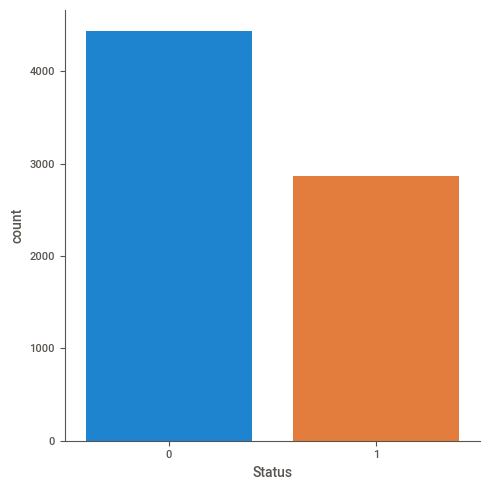

In [86]:
sns.catplot(x='Status',data=data,kind='count')

In [87]:
data.Status.value_counts()   # that data inbalanced ,where we can see .....

0    4441
1    2861
Name: Status, dtype: int64

# Balancing the data

In [88]:
# Install imblearn package - pip install imblearn
!pip install --user imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [89]:
X_smote, y_smote = smote.fit_resample(X,y)

In [90]:
from collections import Counter
print("Actual Classes",Counter(y))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 4441, 1: 2861})
SMOTE Classes Counter({1: 4441, 0: 4441})


In [91]:
# Importing modules from sklearn library.................
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
# Evaluating the model..........................

from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote,test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(6217, 10)
(6217,)
(2665, 10)
(2665,)


# Logistic Regression

Logistic Regression Training Score: 66.53
Logistic Regression Test Score: 67.35
Coefficient: [[ 0.02474437 -0.12629809 -0.07428279 -0.19522464  0.030709    0.00173238
   0.04744898 -0.03187901  0.01418819  0.00123574]]
Intercept: [0.19625585]
Accuracy: 0.6735459662288931
Precision:  0.6739299610894942
recall:  0.6575550493545937
f1_score: 0.665641813989239
AUC: 0.6733620944102345
Confusion Matrix:
 [[929 419]
 [451 866]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.67      0.69      0.68      1348
           1       0.67      0.66      0.67      1317

    accuracy                           0.67      2665
   macro avg       0.67      0.67      0.67      2665
weighted avg       0.67      0.67      0.67      2665



<Axes: >

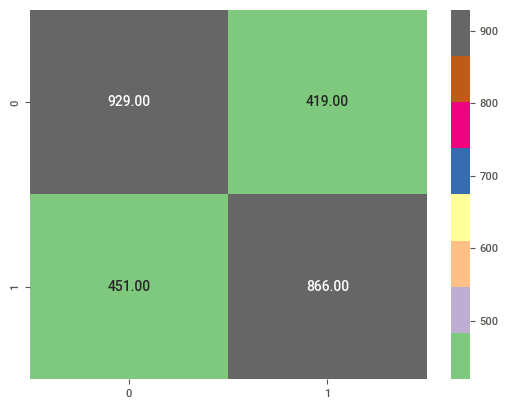

In [93]:
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score =round(logreg.score(X_train, y_train)*100,2)
logreg_score_test =round(logreg.score(X_test, y_test)*100,2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score:' , logreg_score)
print('Logistic Regression Test Score:', logreg_score_test)
print('Coefficient:', logreg.coef_)
print('Intercept:', logreg.intercept_)
print('Accuracy:', accuracy_score(y_test,log_predicted))
print('Precision: ', precision_score(y_test,log_predicted))
print('recall: ', recall_score(y_test,log_predicted))
print('f1_score:', f1_score(y_test,log_predicted))
print('AUC:', roc_auc_score(y_test, log_predicted))
print('Confusion Matrix:\n',confusion_matrix(y_test,log_predicted))
print('Classification Report: \n ', classification_report(y_test,log_predicted))



sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt=".2f",cmap = 'Accent')




# KNN

Score of the model is -  76.45
Report card of this model - 
              precision    recall  f1-score   support

           0      0.738     0.619     0.673      1348
           1      0.665     0.775     0.716      1317

    accuracy                          0.696      2665
   macro avg      0.702     0.697     0.695      2665
weighted avg      0.702     0.696     0.694      2665

Accuracy score -  0.6960600375234521
AUC: 
 0.6969705674933363


<Axes: >

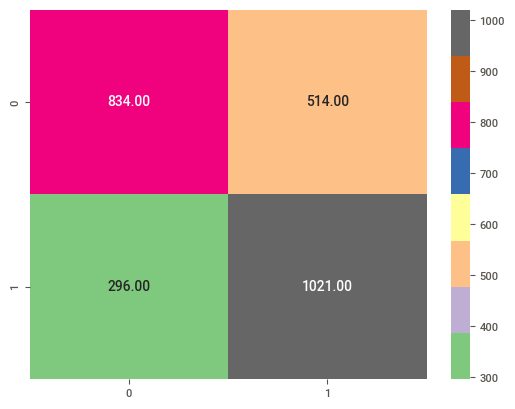

In [94]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_predicted_knn = knn.predict(X_test)
knn_score = round(knn.score(X_train, y_train) * 100, 2)
knn_score_test = round(knn.score(X_test, y_test) * 100, 2)


score = knn.score(X_test, y_test)
print("Score of the model is - ",knn_score)
print("Report card of this model - ")
print(classification_report(y_test, y_predicted_knn, digits=3))
print("Accuracy score - ", accuracy_score(y_test,y_predicted_knn))
print('AUC: \n', roc_auc_score(y_test, y_predicted_knn))





sns.heatmap(confusion_matrix(y_test,y_predicted_knn),annot=True,fmt=".2f",cmap = 'Accent')




# Decission tree

Score of the model is -  0.6983114446529081
Report card of this model - 
              precision    recall  f1-score   support

           0      0.705     0.694     0.699      1348
           1      0.692     0.703     0.697      1317

    accuracy                          0.698      2665
   macro avg      0.698     0.698     0.698      2665
weighted avg      0.698     0.698     0.698      2665

Accuracy score -  0.6983114446529081


<Axes: >

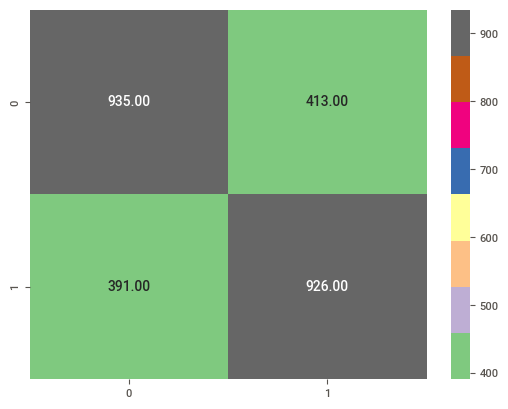

In [95]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(max_depth = None , random_state = 1 , max_features = None, min_samples_leaf =20)
Dtree.fit(X_train,y_train)
y_predicted_dtree = Dtree.predict(X_test)
Dtree_score = round(Dtree.score(X_train, y_train)*100,2)
Dtree_score_test = round(Dtree.score(X_test, y_test)*100,2)




score = Dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(classification_report(y_test, y_predicted_dtree, digits=3))
print("Accuracy score - ", accuracy_score(y_test,y_predicted_dtree))



sns.heatmap(confusion_matrix(y_test,y_predicted_dtree),annot=True,fmt=".2f",cmap = 'Accent')


# Random Forest

Random Forest Score: 
 99.98
Random Forest Test Score: 
 76.36
Accuracy: 
 0.7636022514071295
[[1021  327]
 [ 303 1014]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1348
           1       0.76      0.77      0.76      1317

    accuracy                           0.76      2665
   macro avg       0.76      0.76      0.76      2665
weighted avg       0.76      0.76      0.76      2665



<Axes: >

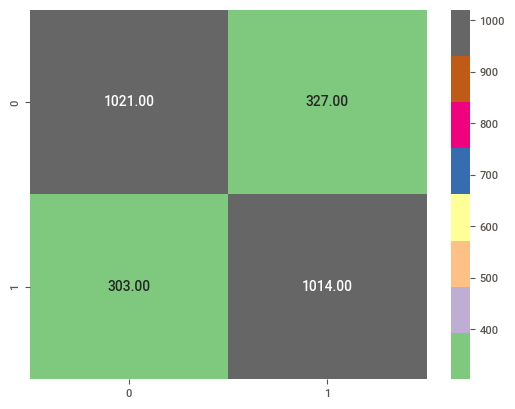

In [96]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train)* 100,2)
random_forest_score_test =round(random_forest.score(X_test, y_test)*100,2)

print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))



sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt=".2f",cmap = 'Accent')


# XGboost

In [97]:
from xgboost import XGBClassifier

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [99]:
model=XGBClassifier(learning_rate=0.1,random_state=32,n_estimators=200)

In [100]:
Xgboost_score=model.fit(X_train,y_train)

In [101]:
Xgboost_score_test =round(random_forest.score(X_test, y_test)*100,2)

In [102]:
y_pred=model.predict(X_test)

In [103]:
cm= confusion_matrix(y_test,y_pred)


Accuracy: 0.7485928705440901
Precision:  0.7394522575869726
recall:  0.7585421412300684
f1_score: 0.7488755622188905
AUC: 0.7487072723954495
Confusion Matrix:
 [[996 352]
 [318 999]]
Classification Report: 
                precision    recall  f1-score   support

           0       0.76      0.74      0.75      1348
           1       0.74      0.76      0.75      1317

    accuracy                           0.75      2665
   macro avg       0.75      0.75      0.75      2665
weighted avg       0.75      0.75      0.75      2665



<Axes: >

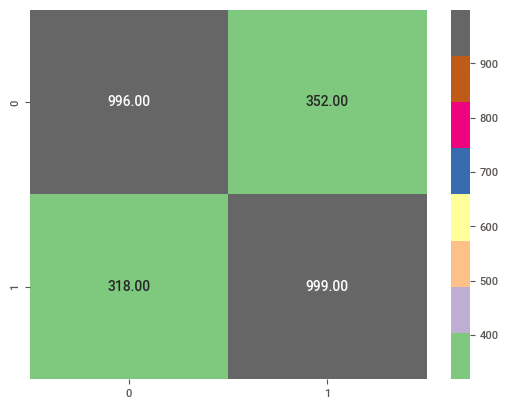

In [104]:
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test,y_pred))
print('recall: ', recall_score(y_test,y_pred))
print('f1_score:', f1_score(y_test,y_pred))
print('AUC:', roc_auc_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report: \n ', classification_report(y_test,y_pred))



sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt=".2f",cmap = 'Accent')


# Model evaluation

In [105]:
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic_Regression', 'KNeighborsClassifier','DecissionTree','Random_Forest','Xg_boost'],
    'Score': [ logreg_score, knn_score,Dtree_score,random_forest_score,Xgboost_score],
    'Accuracy_Score': [logreg_score_test,knn_score_test,Dtree_score_test,random_forest_score_test,Xgboost_score_test]})

models.sort_values(by='Accuracy_Score', ascending=False)

,Model,Score,Accuracy_Score
3,Random_Forest,99.98,76.36
4,Xg_boost,"XGBClassifier(base_score=None, booster=None, c...",76.36
2,DecissionTree,76.74,69.83
1,KNeighborsClassifier,76.45,69.61
0,Logistic_Regression,66.53,67.35


# conclusion